<a href="https://colab.research.google.com/github/mistryvivek/YRKCS-PRBX/blob/main/Lit_Review_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Most of these libraries will be needed throughout the project - fastf1 does not come with Collab by default

In [10]:
%pip install fastf1
import fastf1 as f1
import pandas as pd
import matplotlib as plot

Hard-code base path within Google Drive

In [11]:
VERSION = 'v1'
BASE_PATH = f'/content/drive/MyDrive/prbx_data/{VERSION}'

One issue I started facing was hitting the rate limit - we can create a folder structure like this

year/event_name/{event_name}_{session}.csv

saved under v1 data

In [12]:
import os

def save_event_schedule_and_sessions(year, event_type):
    year_folder = str(year)
    os.makedirs(os.path.join(BASE_PATH, year_folder), exist_ok=True)
    eventCal_path = os.path.join(BASE_PATH, year_folder, f"eventCalender{year}.csv")
    print(eventCal_path)

    if os.path.isfile(eventCal_path):
      # Step 1: Get the event schedule
      eventCal = pd.read_csv(eventCal_path)
      print("Race calender already saved")

    else:
      # Step 1: Get the event schedule
      eventCal = f1.get_event_schedule(year)

      # Step 2: Save eventCal to CSV in the "year" folder
      eventCal.to_csv(eventCal_path, index=False)

    # Step 3: Iterate through each event in eventCal and save session data
    for _, row in eventCal.iterrows():
        event_name = row['OfficialEventName']
        round_number = row['RoundNumber']

        # Format the event folder name (round number + official name with underscores)
        event_folder_name = f"{round_number}_{event_name.replace(' ', '_')}"
        event_folder_path = os.path.join(BASE_PATH, year_folder, event_folder_name)
        os.makedirs(event_folder_path, exist_ok=True)

        file_name = f"{event_folder_name}_{event_type}.csv"
        file_path = os.path.join(BASE_PATH, event_folder_path, file_name)

        # Step 4: If data is already there, don't do anything.
        if os.path.isfile(file_path):
            print(f"Data for {event_name} already exists in {file_path}")
            continue

        # Step 5: Retrieve session data for each event type
        data = f1.get_session(year, event_name, event_type)

        data.load()

        # Step 6: Save session data as CSV in "year/event_folder/event_type" structure
        data.laps.to_csv(file_path, index=False)

    print(f"Event schedule and sessions saved for {year}.")

In [56]:
# Usage
year = 2023  # Example year
save_event_schedule_and_sessions(year, 'Race')

/content/drive/MyDrive/prbx_data/v1/2023/eventCalender2023.csv
Race calender already saved
Data for FORMULA 1 ARAMCO PRE-SEASON TESTING 2023 already exists in /content/drive/MyDrive/prbx_data/v1/2023/0_FORMULA_1_ARAMCO_PRE-SEASON_TESTING_2023/0_FORMULA_1_ARAMCO_PRE-SEASON_TESTING_2023_Race.csv
Data for FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023 already exists in /content/drive/MyDrive/prbx_data/v1/2023/1_FORMULA_1_GULF_AIR_BAHRAIN_GRAND_PRIX_2023/1_FORMULA_1_GULF_AIR_BAHRAIN_GRAND_PRIX_2023_Race.csv
Data for FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023 already exists in /content/drive/MyDrive/prbx_data/v1/2023/2_FORMULA_1_STC_SAUDI_ARABIAN_GRAND_PRIX_2023/2_FORMULA_1_STC_SAUDI_ARABIAN_GRAND_PRIX_2023_Race.csv
Data for FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023 already exists in /content/drive/MyDrive/prbx_data/v1/2023/3_FORMULA_1_ROLEX_AUSTRALIAN_GRAND_PRIX_2023/3_FORMULA_1_ROLEX_AUSTRALIAN_GRAND_PRIX_2023_Race.csv
Data for FORMULA 1 AZERBAIJAN GRAND PRIX 2023 already exists in /content

core           INFO 	Loading data for Belgian Grand Prix - Race [v3.4.3]
INFO:fastf1.fastf1.core:Loading data for Belgian Grand Prix - Race [v3.4.3]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

Data for FORMULA 1 HEINEKEN DUTCH GRAND PRIX 2023 already exists in /content/drive/MyDrive/prbx_data/v1/2023/13_FORMULA_1_HEINEKEN_DUTCH_GRAND_PRIX_2023/13_FORMULA_1_HEINEKEN_DUTCH_GRAND_PRIX_2023_Race.csv
Data for FORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2023  already exists in /content/drive/MyDrive/prbx_data/v1/2023/14_FORMULA_1_PIRELLI_GRAN_PREMIO_D’ITALIA_2023_/14_FORMULA_1_PIRELLI_GRAN_PREMIO_D’ITALIA_2023__Race.csv
Data for FORMULA 1 SINGAPORE AIRLINES SINGAPORE GRAND PRIX 2023  already exists in /content/drive/MyDrive/prbx_data/v1/2023/15_FORMULA_1_SINGAPORE_AIRLINES_SINGAPORE_GRAND_PRIX_2023_/15_FORMULA_1_SINGAPORE_AIRLINES_SINGAPORE_GRAND_PRIX_2023__Race.csv
Data for FORMULA 1 LENOVO JAPANESE GRAND PRIX 2023  already exists in /content/drive/MyDrive/prbx_data/v1/2023/16_FORMULA_1_LENOVO_JAPANESE_GRAND_PRIX_2023_/16_FORMULA_1_LENOVO_JAPANESE_GRAND_PRIX_2023__Race.csv
Data for FORMULA 1 QATAR AIRWAYS QATAR GRAND PRIX 2023 already exists in /content/drive/MyDrive/prbx_data/v1/2023

In [14]:
year = 2022  # Year vs year comparision
save_event_schedule_and_sessions(year, 'Race')

/content/drive/MyDrive/prbx_data/v1/2022/eventCalender2022.csv
Race calender already saved
Data for FORMULA 1 PRE-SEASON TRACK SESSION 2022 already exists in /content/drive/MyDrive/prbx_data/v1/2022/0_FORMULA_1_PRE-SEASON_TRACK_SESSION_2022/0_FORMULA_1_PRE-SEASON_TRACK_SESSION_2022_Race.csv
Data for FORMULA 1 ARAMCO PRE-SEASON TESTING 2022 already exists in /content/drive/MyDrive/prbx_data/v1/2022/0_FORMULA_1_ARAMCO_PRE-SEASON_TESTING_2022/0_FORMULA_1_ARAMCO_PRE-SEASON_TESTING_2022_Race.csv
Data for FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022 already exists in /content/drive/MyDrive/prbx_data/v1/2022/1_FORMULA_1_GULF_AIR_BAHRAIN_GRAND_PRIX_2022/1_FORMULA_1_GULF_AIR_BAHRAIN_GRAND_PRIX_2022_Race.csv
Data for FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022 already exists in /content/drive/MyDrive/prbx_data/v1/2022/2_FORMULA_1_STC_SAUDI_ARABIAN_GRAND_PRIX_2022/2_FORMULA_1_STC_SAUDI_ARABIAN_GRAND_PRIX_2022_Race.csv
Data for FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022 already exists in /content

Common times to pit - inc. latest pit window with biggest gap

- Min, Max, Mode. Median, SD for all pit decisions.
- Compare this againist positions lost or gained AND points scored.

2022 and 2023

In [71]:
data = f1.get_session(2023, "FORMULA 1 MSC CRUISES BELGUIM GRAND PRIX", "Race")
data.load()
testDf = data.laps

events      WARNING 	Correcting user input 'FORMULA 1 MSC CRUISES BELGUIM GRAND PRIX' to 'Belgian Grand Prix'
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.4.3]
INFO:fastf1.fastf1.core:Loading data for Belgian Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Us

In [58]:
testDf

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:04:40.504000,VER,1,0 days 00:01:55.659000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:49.787000,...,True,Red Bull Racing,0 days 01:02:44.614000,2023-07-30 13:03:45.833,1,5.0,False,,False,False
1,0 days 01:06:33.607000,VER,1,0 days 00:01:53.103000,2.0,1.0,NaT,NaT,0 days 00:00:32.291000,0 days 00:00:50.712000,...,True,Red Bull Racing,0 days 01:04:40.504000,2023-07-30 13:05:41.723,12,4.0,False,,False,True
2,0 days 01:08:25.884000,VER,1,0 days 00:01:52.277000,3.0,1.0,NaT,NaT,0 days 00:00:31.758000,0 days 00:00:50.325000,...,True,Red Bull Racing,0 days 01:06:33.607000,2023-07-30 13:07:34.826,21,4.0,False,,False,True
3,0 days 01:10:18.673000,VER,1,0 days 00:01:52.789000,4.0,1.0,NaT,NaT,0 days 00:00:31.881000,0 days 00:00:50.599000,...,True,Red Bull Racing,0 days 01:08:25.884000,2023-07-30 13:09:27.103,1,4.0,False,,False,True
4,0 days 01:12:11.275000,VER,1,0 days 00:01:52.602000,5.0,1.0,NaT,NaT,0 days 00:00:32.001000,0 days 00:00:50.201000,...,True,Red Bull Racing,0 days 01:10:18.673000,2023-07-30 13:11:19.892,1,4.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,0 days 01:41:37.216000,SAI,55,0 days 00:01:56.426000,20.0,2.0,NaT,NaT,0 days 00:00:32.648000,0 days 00:00:52.419000,...,True,Ferrari,0 days 01:39:40.790000,2023-07-30 13:40:42.009,1,19.0,False,,False,True
812,0 days 01:43:37.378000,SAI,55,0 days 00:02:00.162000,21.0,2.0,NaT,NaT,0 days 00:00:32.787000,0 days 00:00:54.760000,...,True,Ferrari,0 days 01:41:37.216000,2023-07-30 13:42:38.435,1,19.0,True,TRACK LIMITS AT TURN 11 LAP 21,False,True
813,0 days 01:45:35.327000,SAI,55,0 days 00:01:57.949000,22.0,2.0,NaT,NaT,0 days 00:00:32.936000,0 days 00:00:53.638000,...,True,Ferrari,0 days 01:43:37.378000,2023-07-30 13:44:38.597,1,19.0,False,,False,True
814,0 days 01:47:38.690000,SAI,55,0 days 00:02:03.363000,23.0,2.0,NaT,0 days 01:47:34.913000,0 days 00:00:32.748000,0 days 00:00:52.157000,...,True,Ferrari,0 days 01:45:35.327000,2023-07-30 13:46:36.546,1,19.0,False,,False,False


In [16]:
testPitIn = testDf[~testDf['PitInTime'].isnull()]
lapsCompletedVsPositionDf = pd.DataFrame(columns=["Positions Lost", "Race Completed", "Position Before Pit"])

maxLaps = testDf['LapNumber'].max()

for index, row in testPitIn.iterrows():
  # Race completion (over laps)
  # Whether they had a position change
  race_completed = row['LapNumber'] / maxLaps * 100
  position_lost = row['Position'] > testDf[
        (testDf['LapNumber'] == row['LapNumber'] - 1) &
        (testDf['Driver'] == row['Driver'])]['Position'].iloc[0]

  new_row = {
        "Race Completed": race_completed,
        "Positions Lost": position_lost,
        "Position Before Pit": row['Position']
    }

  # Append the new row to the DataFrame
  lapsCompletedVsPositionDf = pd.concat([lapsCompletedVsPositionDf, pd.DataFrame([new_row])], ignore_index=True)

<ipython-input-16-27938726fde3>:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lapsCompletedVsPositionDf = pd.concat([lapsCompletedVsPositionDf, pd.DataFrame([new_row])], ignore_index=True)


In [17]:
lapsCompletedVsPositionDf

,Positions Lost,Race Completed,Position Before Pit
0,False,45.614035,1.0
1,False,28.070175,7.0
2,True,70.175439,15.0
3,True,78.947368,18.0
4,True,47.368421,4.0
5,False,71.929825,4.0
6,True,26.315789,9.0
7,True,42.105263,3.0
8,True,70.175439,11.0
9,True,21.052632,13.0


***Use that to create a new scatterplots***

Modified function to use CSV data instead

In [18]:
# Create a fn which can takes each race and add more relevent pit stops information into the same df.
def getPitStopsDfWithCSV(year, version):
  dfCalender = pd.read_csv(f'{BASE_PATH}/{year}/eventCalender{year}.csv')
  # Store all pit stop info.
  pitstopDf = pd.DataFrame(columns=["Positions Lost", "Race Completed", "Position Before Pit"])

  for _, row in dfCalender.iterrows():
    if row['EventFormat'] != 'testing':
      raceDf = pd.read_csv(f'{BASE_PATH}/{year}/{row["RoundNumber"]}_{row["OfficialEventName"].replace(" ", "_")}/{row["RoundNumber"]}_{row["OfficialEventName"].replace(" ", "_")}_Race.csv')

      # If they have not got into pits, stop has not taken place.
      race_laps_with_pit_stop = raceDf[~raceDf['PitInTime'].isnull()]

      maxLaps = raceDf['LapNumber'].max()

      for index, row in race_laps_with_pit_stop.iterrows():
        # Race completion (over laps)
        # Whether they had a position change
        race_completed = row['LapNumber'] / maxLaps * 100
        try:
          position_lost = row['Position'] > raceDf[
                (raceDf['LapNumber'] == row['LapNumber'] + 1) &
                (raceDf['Driver'] == row['Driver'])]['Position'].iloc[0]
        except:
        # In the event they pit on the last lap, means that they don't finish the race.
          pass

        new_row = {
              "Race Completed": race_completed,
              "Positions Lost": position_lost,
              "Position Before Pit": row['Position']
          }

        # Append the new row to the DataFrame
        pitstopDf = pd.concat([pitstopDf, pd.DataFrame([new_row])], ignore_index=True)

  return pitstopDf

pitstops23 = getPitStopsDfWithCSV(2023, 'v1')

<ipython-input-18-caafe3d01a3a>:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pitstopDf = pd.concat([pitstopDf, pd.DataFrame([new_row])], ignore_index=True)


In [19]:
pitstops22 = getPitStopsDfWithCSV(2022, 'v1')

<ipython-input-18-caafe3d01a3a>:35: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pitstopDf = pd.concat([pitstopDf, pd.DataFrame([new_row])], ignore_index=True)


Plotting data

In [20]:
# Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

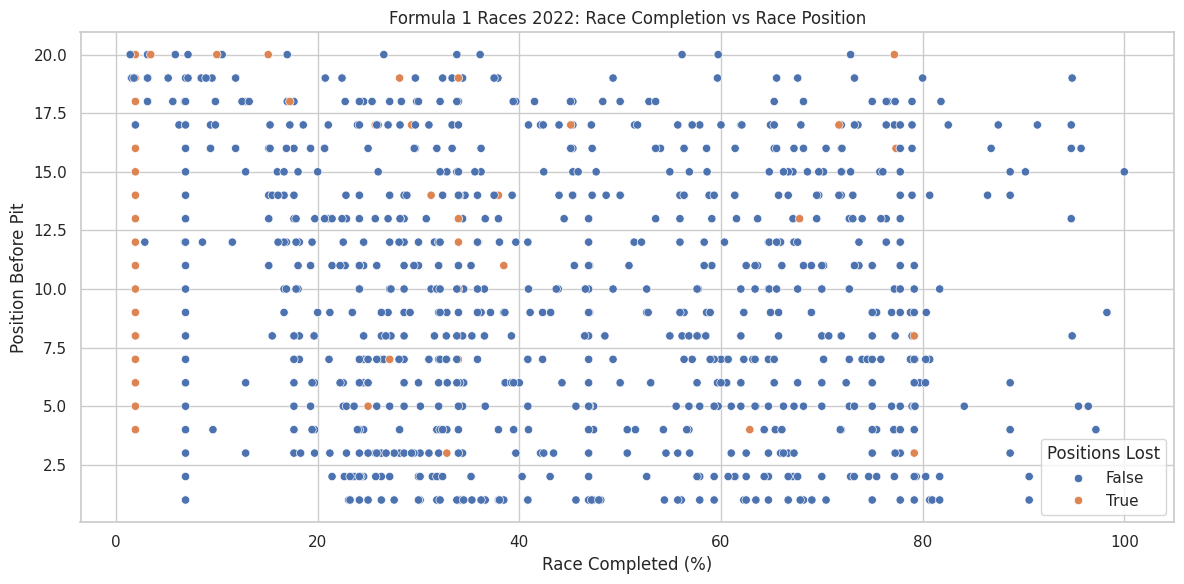

In [21]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Race Completed", y="Position Before Pit", hue="Positions Lost", data=pitstops22, color="blue")
plt.title("Formula 1 Races 2022: Race Completion vs Race Position")
plt.xlabel("Race Completed (%)")
plt.ylabel("Position Before Pit")

# Adjust layout
plt.tight_layout()
plt.show()

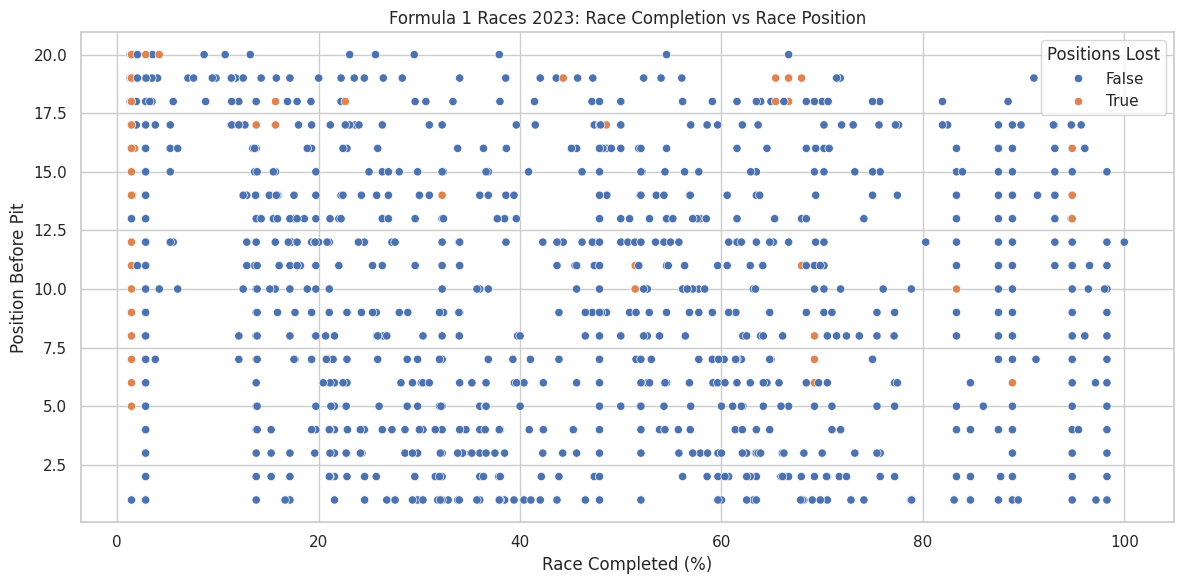

In [22]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Race Completed", y="Position Before Pit", hue="Positions Lost", data=pitstops23, color="blue")
plt.title("Formula 1 Races 2023: Race Completion vs Race Position")
plt.xlabel("Race Completed (%)")
plt.ylabel("Position Before Pit")

# Adjust layout
plt.tight_layout()
plt.show()

Interesting to see if we limit this by people who are in for points (top 10)

In [23]:
# Create a fn which can takes each race and add more relevent pit stops information into the same df.
def getPitStopsDfWithCSVTop10(year, version):
  dfCalender = pd.read_csv(f'{BASE_PATH}/{year}/eventCalender{year}.csv')
  # Store all pit stop info.
  pitstopDf = pd.DataFrame(columns=["Positions Lost", "Race Completed", "Position Before Pit"])

  for _, row in dfCalender.iterrows():
    if row['EventFormat'] != 'testing':
      raceDf = pd.read_csv(f'{BASE_PATH}/{year}/{row["RoundNumber"]}_{row["OfficialEventName"].replace(" ", "_")}/{row["RoundNumber"]}_{row["OfficialEventName"].replace(" ", "_")}_Race.csv')

      # If they have not got into pits, stop has not taken place.
      race_laps_with_pit_stop = raceDf[~raceDf['PitInTime'].isnull()]

      maxLaps = raceDf['LapNumber'].max()

      for index, row in race_laps_with_pit_stop.iterrows():
        if row['Position'] >= 11:
          continue

        # Race completion (over laps)
        # Whether they had a position change
        race_completed = row['LapNumber'] / maxLaps * 100
        try:
          position_lost = row['Position'] > raceDf[
                (raceDf['LapNumber'] == row['LapNumber'] + 1) &
                (raceDf['Driver'] == row['Driver'])]['Position'].iloc[0]
        except:
        # In the event they pit on the last lap, means that they don't finish the race.
          pass

        new_row = {
              "Race Completed": race_completed,
              "Positions Lost": position_lost,
              "Position Before Pit": row['Position']
          }

        # Append the new row to the DataFrame
        pitstopDf = pd.concat([pitstopDf, pd.DataFrame([new_row])], ignore_index=True)

  return pitstopDf

pitstops23Top10 = getPitStopsDfWithCSVTop10(2023, 'v1')
pitstops22Top10 = getPitStopsDfWithCSVTop10(2022, 'v1')

<ipython-input-23-2c7d9a87051f>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pitstopDf = pd.concat([pitstopDf, pd.DataFrame([new_row])], ignore_index=True)
<ipython-input-23-2c7d9a87051f>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pitstopDf = pd.concat([pitstopDf, pd.DataFrame([new_row])], ignore_index=True)


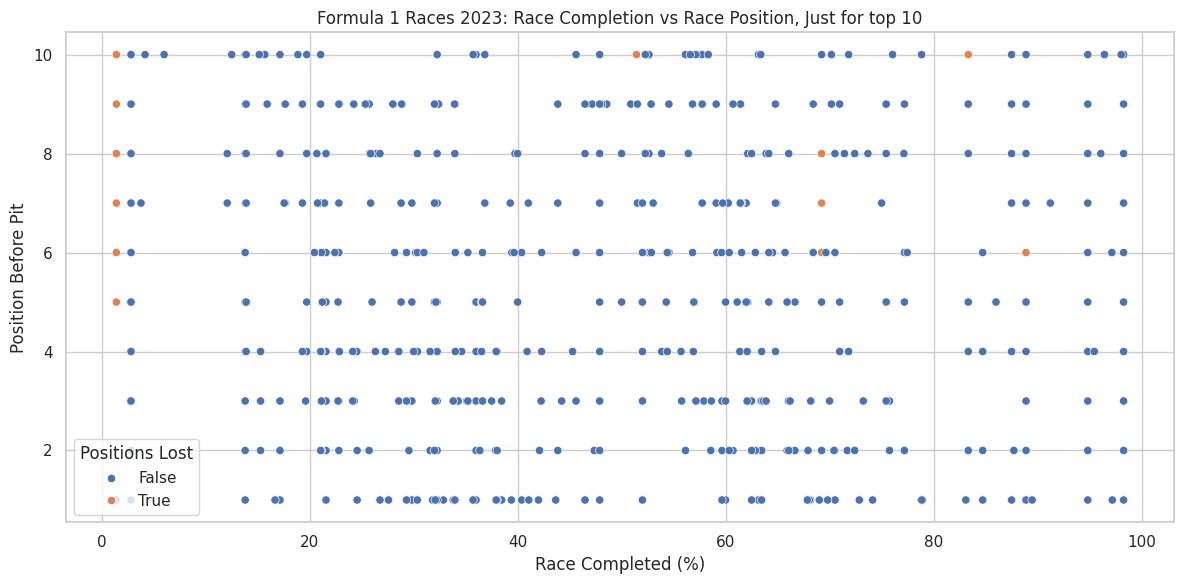

In [24]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Race Completed", y="Position Before Pit", hue="Positions Lost", data=pitstops23Top10, color="blue")
plt.title("Formula 1 Races 2023: Race Completion vs Race Position, Just for top 10")
plt.xlabel("Race Completed (%)")
plt.ylabel("Position Before Pit")

# Adjust layout
plt.tight_layout()
plt.show()

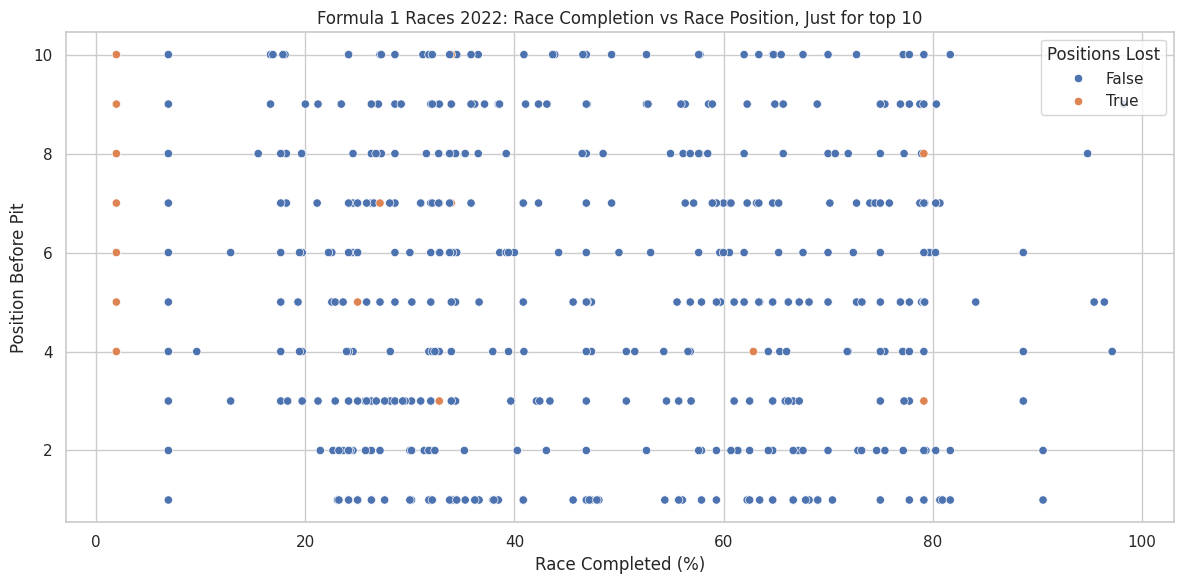

In [25]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Race Completed", y="Position Before Pit", hue="Positions Lost", data=pitstops22Top10, color="blue")
plt.title("Formula 1 Races 2022: Race Completion vs Race Position, Just for top 10")
plt.xlabel("Race Completed (%)")
plt.ylabel("Position Before Pit")

# Adjust layout
plt.tight_layout()
plt.show()

In [26]:
pitstops23

,Positions Lost,Race Completed,Position Before Pit
0,False,24.561404,1.0
1,False,63.157895,1.0
2,False,15.789474,19.0
3,False,43.859649,12.0
4,False,70.175439,10.0
...,...,...,...
938,False,96.551724,11.0
939,False,98.275862,15.0
940,False,50.000000,16.0
941,False,8.620690,20.0


In [27]:
pitstops23['Race Completed'].describe()

,Race Completed
count,943.000000
mean,43.163067
std,27.476685
min,1.282051
25%,20.000000
50%,40.384615
75%,63.888889
max,100.000000


In [28]:
pitstops23[pitstops23['Positions Lost'] == False]['Race Completed'].describe()

,Race Completed
count,893.000000
mean,43.993205
std,26.884801
min,1.282051
25%,21.212121
50%,42.000000
75%,63.888889
max,100.000000


In [29]:
pitstops22['Race Completed'].describe()

,Race Completed
count,836.000000
mean,44.431216
std,23.636740
min,1.408451
25%,25.862069
50%,40.845070
75%,65.277778
max,100.000000


In [30]:
pitstops22[pitstops22['Positions Lost'] == False]['Race Completed'].describe()

,Race Completed
count,790.000000
mean,45.473703
std,23.160298
min,1.408451
25%,26.562500
50%,42.739899
75%,65.517241
max,100.000000


Is Linear tire deg suitable - look at past data model.

- Plot two driver over a season - take the worse and the best.
- One street circuit and one normal - Baku and Sliverstone

1st that season - Verstappen
20th that season - K Mag (De Vries and Lawson below - didn't do a full season)

In [31]:
baku2023 = pd.read_csv('/content/drive/MyDrive/prbx_data/v1/2023/4_FORMULA_1_AZERBAIJAN_GRAND_PRIX_2023/4_FORMULA_1_AZERBAIJAN_GRAND_PRIX_2023_Race.csv')
sliverstone2023 = pd.read_csv('/content/drive/MyDrive/prbx_data/v1/2023/10_FORMULA_1_ARAMCO_BRITISH_GRAND_PRIX_2023/10_FORMULA_1_ARAMCO_BRITISH_GRAND_PRIX_2023_Race.csv')

baku2023['ConvertedLapTime'] = baku2023['LapTime'].apply(lambda x: pd.to_timedelta(x).total_seconds())
sliverstone2023['ConvertedLapTime'] = sliverstone2023['LapTime'].apply(lambda x: pd.to_timedelta(x).total_seconds())

In [32]:
baku2023

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,ConvertedLapTime
0,0 days 01:04:52.482000,VER,1,0 days 00:01:50.456000,1.0,1.0,NaN,NaN,NaN,0 days 00:00:43.217000,...,Red Bull Racing,0 days 01:03:01.758000,2023-04-30 11:04:03.228,12,2.0,False,NaN,False,False,110.456
1,0 days 01:06:40.189000,VER,1,0 days 00:01:47.707000,2.0,1.0,NaN,NaN,0 days 00:00:38.431000,0 days 00:00:43.642000,...,Red Bull Racing,0 days 01:04:52.482000,2023-04-30 11:05:53.952,1,2.0,False,NaN,False,True,107.707
2,0 days 01:08:27.866000,VER,1,0 days 00:01:47.677000,3.0,1.0,NaN,NaN,0 days 00:00:38.493000,0 days 00:00:43.718000,...,Red Bull Racing,0 days 01:06:40.189000,2023-04-30 11:07:41.659,1,1.0,False,NaN,False,True,107.677
3,0 days 01:10:14.974000,VER,1,0 days 00:01:47.108000,4.0,1.0,NaN,NaN,0 days 00:00:37.933000,0 days 00:00:43.372000,...,Red Bull Racing,0 days 01:08:27.866000,2023-04-30 11:09:29.336,1,1.0,False,NaN,False,True,107.108
4,0 days 01:12:02.450000,VER,1,0 days 00:01:47.476000,5.0,1.0,NaN,NaN,0 days 00:00:38.284000,0 days 00:00:43.414000,...,Red Bull Racing,0 days 01:10:14.974000,2023-04-30 11:11:16.444,1,1.0,False,NaN,False,True,107.476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0 days 02:30:05.748000,PIA,81,0 days 00:01:47.158000,47.0,2.0,NaN,NaN,0 days 00:00:38.037000,0 days 00:00:44.059000,...,McLaren,0 days 02:28:18.590000,2023-04-30 12:29:20.060,1,13.0,False,NaN,False,True,107.158
958,0 days 02:31:52.808000,PIA,81,0 days 00:01:47.060000,48.0,2.0,NaN,NaN,0 days 00:00:38.303000,0 days 00:00:43.356000,...,McLaren,0 days 02:30:05.748000,2023-04-30 12:31:07.218,12,12.0,False,NaN,False,True,107.060
959,0 days 02:33:39.238000,PIA,81,0 days 00:01:46.430000,49.0,2.0,NaN,NaN,0 days 00:00:38.004000,0 days 00:00:42.996000,...,McLaren,0 days 02:31:52.808000,2023-04-30 12:32:54.278,1,12.0,False,NaN,False,True,106.430
960,0 days 02:35:25.351000,PIA,81,0 days 00:01:46.113000,50.0,2.0,NaN,NaN,0 days 00:00:37.633000,0 days 00:00:43.080000,...,McLaren,0 days 02:33:39.238000,2023-04-30 12:34:40.708,1,12.0,False,NaN,False,True,106.113


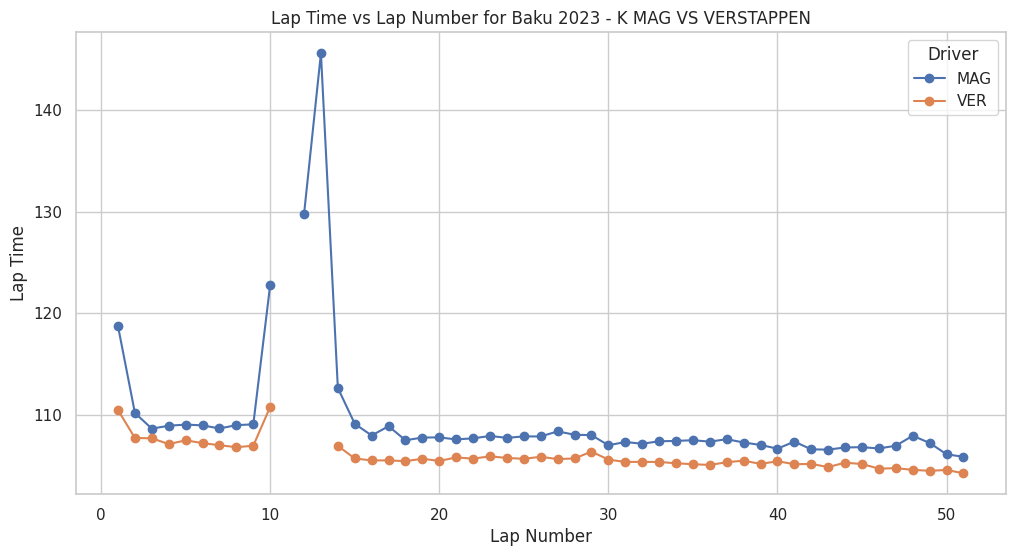

In [33]:
# Start plotting
plt.figure(figsize=(12, 6))

# Group by 'Driver' and plot each driver's lap times against lap numbers
for driver, group_data in baku2023.groupby('Driver'):
    if driver == 'MAG' or driver == 'VER':
      plt.plot(group_data['LapNumber'], group_data['ConvertedLapTime'], label=driver, marker='o')

# Adding labels and title
plt.xlabel('Lap Number')
plt.ylabel('Lap Time')
plt.title('Lap Time vs Lap Number for Baku 2023 - K MAG VS VERSTAPPEN')
plt.legend(title='Driver')
plt.grid(True)

# Show plot
plt.show()

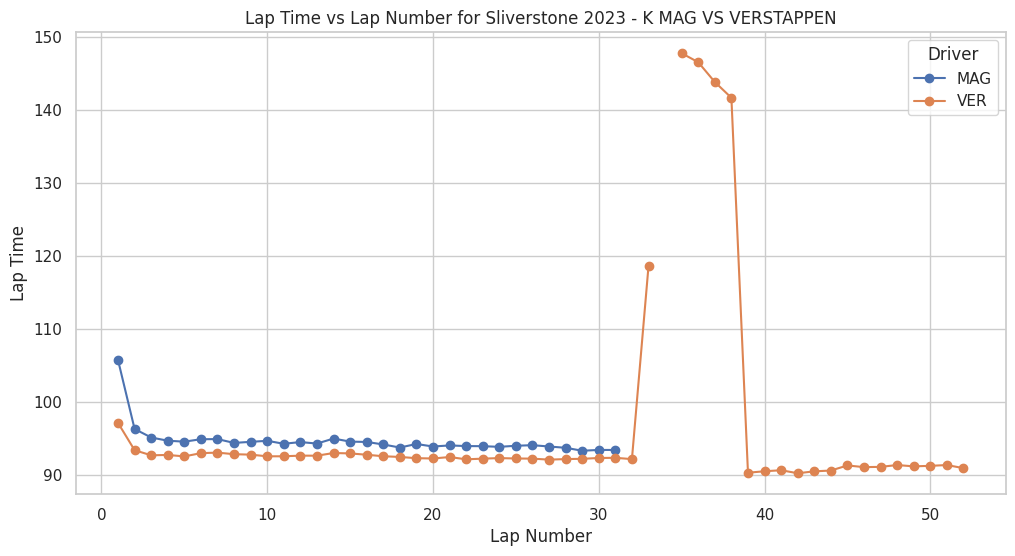

In [34]:
# Start plotting
plt.figure(figsize=(12, 6))

# Group by 'Driver' and plot each driver's lap times against lap numbers
for driver, group_data in sliverstone2023.groupby('Driver'):
    if driver == 'MAG' or driver == 'VER':
      plt.plot(group_data['LapNumber'], group_data['ConvertedLapTime'], label=driver, marker='o')

# Adding labels and title
plt.xlabel('Lap Number')
plt.ylabel('Lap Time')
plt.title('Lap Time vs Lap Number for Sliverstone 2023 - K MAG VS VERSTAPPEN')
plt.legend(title='Driver')
plt.grid(True)

# Show plot
plt.show()

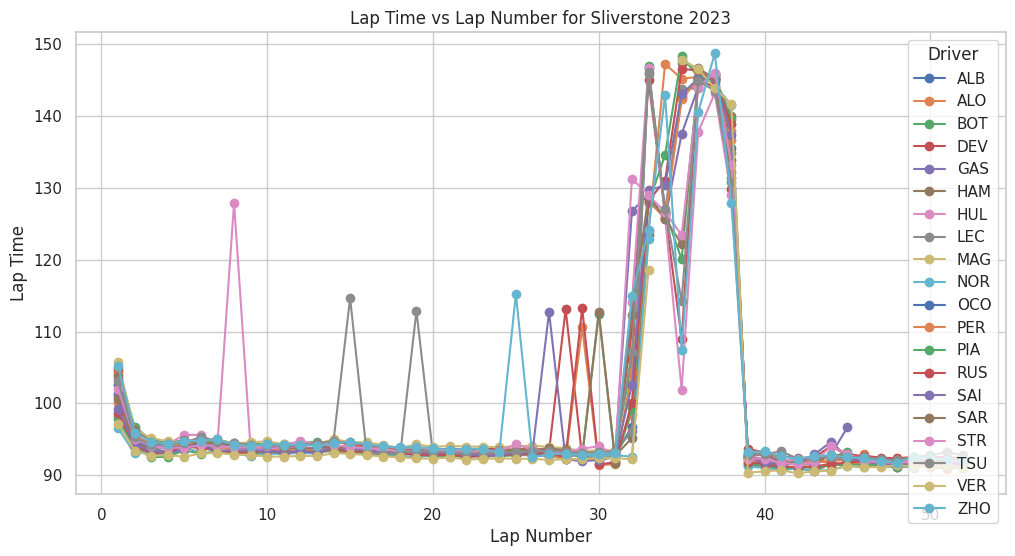

In [35]:
# Start plotting
plt.figure(figsize=(12, 6))

# Group by 'Driver' and plot each driver's lap times against lap numbers
for driver, group_data in sliverstone2023.groupby('Driver'):
    plt.plot(group_data['LapNumber'], group_data['ConvertedLapTime'], label=driver, marker='o')

# Adding labels and title
plt.xlabel('Lap Number')
plt.ylabel('Lap Time')
plt.title('Lap Time vs Lap Number for Sliverstone 2023')
plt.legend(title='Driver')
plt.grid(True)

# Show plot
plt.show()

* Some sort of random decrease, it is not exactly linear.
* Would it be better to plot time difference in this scenerio.

In [36]:
def findTimeDifference(df):
  new_col = []
  # Account for final lap with the try clause
  for _, row in df.iterrows():
    try:
      find_next_lap = df[(df['LapNumber'] == row['LapNumber'] + 1) & (df['Driver'] == row['Driver'])].iloc[0]
      new_col.append(find_next_lap['ConvertedLapTime'] - row['ConvertedLapTime'])
    except:
      new_col.append(np.nan)

  df['TimeDifference'] = new_col

  return df

In [37]:
import numpy as np
baku2023TimeDifference = findTimeDifference(baku2023)
sliverstone2023TimeDifference = findTimeDifference(sliverstone2023)

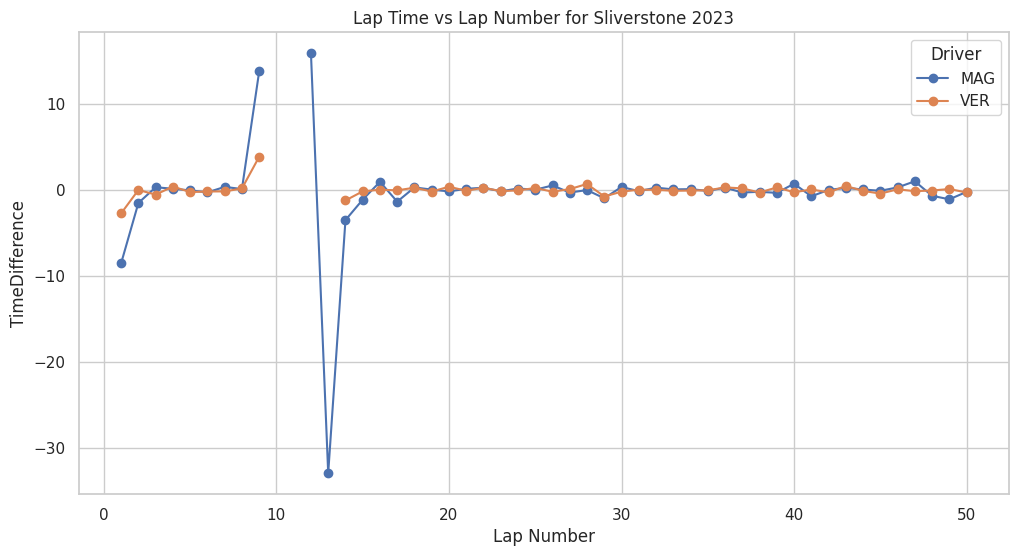

In [38]:
# Start plotting
plt.figure(figsize=(12, 6))

# Group by 'Driver' and plot each driver's lap times against lap numbers
for driver, group_data in baku2023TimeDifference.groupby('Driver'):
  if driver == 'MAG' or driver == 'VER':
    plt.plot(group_data['LapNumber'], group_data['TimeDifference'], label=driver, marker='o')

# Adding labels and title
plt.xlabel('Lap Number')
plt.ylabel('TimeDifference')
plt.title('Lap Time vs Lap Number for Sliverstone 2023')
plt.legend(title='Driver')
plt.grid(True)

# Show plot
plt.show()

In [39]:
baku2023TimeDifference

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,ConvertedLapTime,TimeDifference
0,0 days 01:04:52.482000,VER,1,0 days 00:01:50.456000,1.0,1.0,NaN,NaN,NaN,0 days 00:00:43.217000,...,0 days 01:03:01.758000,2023-04-30 11:04:03.228,12,2.0,False,NaN,False,False,110.456,-2.749
1,0 days 01:06:40.189000,VER,1,0 days 00:01:47.707000,2.0,1.0,NaN,NaN,0 days 00:00:38.431000,0 days 00:00:43.642000,...,0 days 01:04:52.482000,2023-04-30 11:05:53.952,1,2.0,False,NaN,False,True,107.707,-0.030
2,0 days 01:08:27.866000,VER,1,0 days 00:01:47.677000,3.0,1.0,NaN,NaN,0 days 00:00:38.493000,0 days 00:00:43.718000,...,0 days 01:06:40.189000,2023-04-30 11:07:41.659,1,1.0,False,NaN,False,True,107.677,-0.569
3,0 days 01:10:14.974000,VER,1,0 days 00:01:47.108000,4.0,1.0,NaN,NaN,0 days 00:00:37.933000,0 days 00:00:43.372000,...,0 days 01:08:27.866000,2023-04-30 11:09:29.336,1,1.0,False,NaN,False,True,107.108,0.368
4,0 days 01:12:02.450000,VER,1,0 days 00:01:47.476000,5.0,1.0,NaN,NaN,0 days 00:00:38.284000,0 days 00:00:43.414000,...,0 days 01:10:14.974000,2023-04-30 11:11:16.444,1,1.0,False,NaN,False,True,107.476,-0.274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,0 days 02:30:05.748000,PIA,81,0 days 00:01:47.158000,47.0,2.0,NaN,NaN,0 days 00:00:38.037000,0 days 00:00:44.059000,...,0 days 02:28:18.590000,2023-04-30 12:29:20.060,1,13.0,False,NaN,False,True,107.158,-0.098
958,0 days 02:31:52.808000,PIA,81,0 days 00:01:47.060000,48.0,2.0,NaN,NaN,0 days 00:00:38.303000,0 days 00:00:43.356000,...,0 days 02:30:05.748000,2023-04-30 12:31:07.218,12,12.0,False,NaN,False,True,107.060,-0.630
959,0 days 02:33:39.238000,PIA,81,0 days 00:01:46.430000,49.0,2.0,NaN,NaN,0 days 00:00:38.004000,0 days 00:00:42.996000,...,0 days 02:31:52.808000,2023-04-30 12:32:54.278,1,12.0,False,NaN,False,True,106.430,-0.317
960,0 days 02:35:25.351000,PIA,81,0 days 00:01:46.113000,50.0,2.0,NaN,NaN,0 days 00:00:37.633000,0 days 00:00:43.080000,...,0 days 02:33:39.238000,2023-04-30 12:34:40.708,1,12.0,False,NaN,False,True,106.113,-0.482


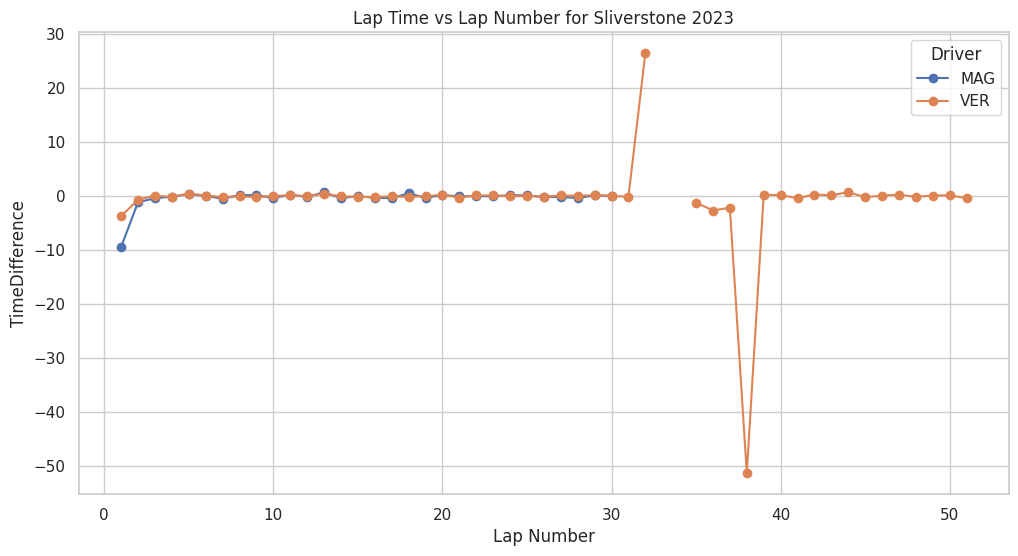

In [40]:
# Start plotting
plt.figure(figsize=(12, 6))

# Group by 'Driver' and plot each driver's lap times against lap numbers
for driver, group_data in sliverstone2023TimeDifference.groupby('Driver'):
  if driver == 'MAG' or driver == 'VER':
    plt.plot(group_data['LapNumber'], group_data['TimeDifference'], label=driver, marker='o')

# Adding labels and title
plt.xlabel('Lap Number')
plt.ylabel('TimeDifference')
plt.title('Lap Time vs Lap Number for Sliverstone 2023')
plt.legend(title='Driver')
plt.grid(True)

# Show plot
plt.show()

Anything we can remove, normally talk about tenth of seconds

Anything in the bound 0 to 1

In [41]:
baku2023TimeDifferenceSubOne = baku2023TimeDifference[(baku2023TimeDifference['TimeDifference'] < 2) & (baku2023TimeDifference['TimeDifference'] > -2)]
sliverstone2023TimeDifferenceSubOne = sliverstone2023TimeDifference[(sliverstone2023TimeDifference['TimeDifference'] < 2) & (sliverstone2023TimeDifference['TimeDifference'] > -2)]

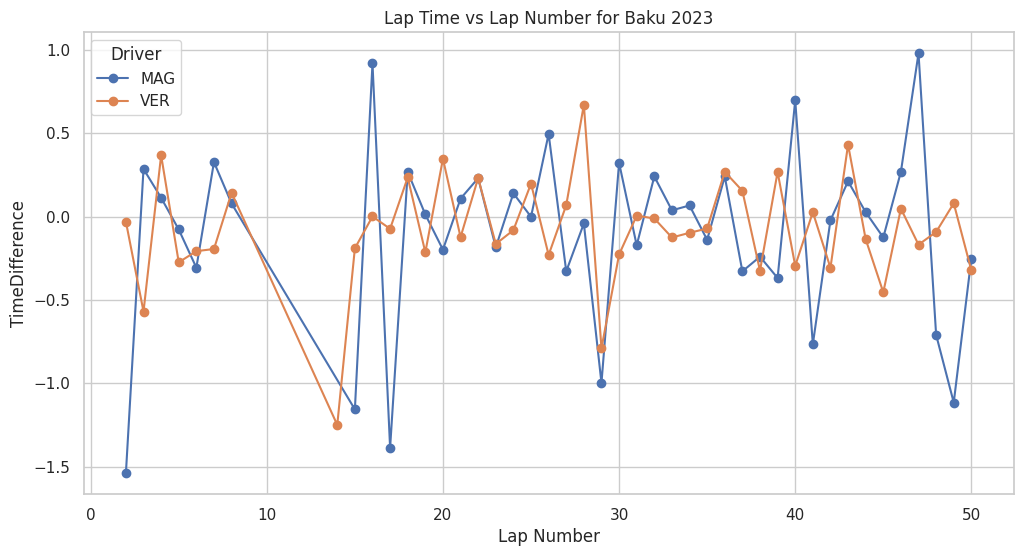

In [42]:
# Start plotting
plt.figure(figsize=(12, 6))

# Group by 'Driver' and plot each driver's lap times against lap numbers
for driver, group_data in baku2023TimeDifferenceSubOne.groupby('Driver'):
  if driver == 'MAG' or driver == 'VER':
    plt.plot(group_data['LapNumber'], group_data['TimeDifference'], label=driver, marker='o')

# Adding labels and title
plt.xlabel('Lap Number')
plt.ylabel('TimeDifference')
plt.title('Lap Time vs Lap Number for Baku 2023')
plt.legend(title='Driver')
plt.grid(True)

# Show plot
plt.show()

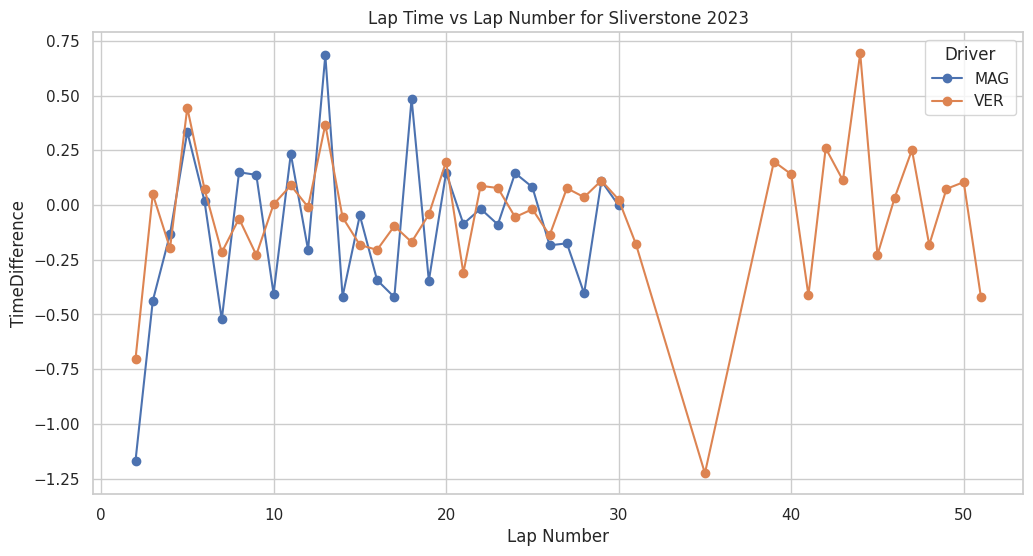

In [43]:
# Start plotting
plt.figure(figsize=(12, 6))

# Group by 'Driver' and plot each driver's lap times against lap numbers
for driver, group_data in sliverstone2023TimeDifferenceSubOne.groupby('Driver'):
  if driver == 'MAG' or driver == 'VER':
    plt.plot(group_data['LapNumber'], group_data['TimeDifference'], label=driver, marker='o')

# Adding labels and title
plt.xlabel('Lap Number')
plt.ylabel('TimeDifference')
plt.title('Lap Time vs Lap Number for Sliverstone 2023')
plt.legend(title='Driver')
plt.grid(True)

# Show plot
plt.show()

In [44]:
baku2022 = pd.read_csv('/content/drive/MyDrive/prbx_data/v1/2022/8_FORMULA_1_AZERBAIJAN_GRAND_PRIX_2022/8_FORMULA_1_AZERBAIJAN_GRAND_PRIX_2022_Race.csv')
sliverstone2022 = pd.read_csv('/content/drive/MyDrive/prbx_data/v1/2022/10_FORMULA_1_LENOVO_BRITISH_GRAND_PRIX_2022/10_FORMULA_1_LENOVO_BRITISH_GRAND_PRIX_2022_Race.csv')

baku2022['ConvertedLapTime'] = baku2022['LapTime'].apply(lambda x: pd.to_timedelta(x).total_seconds())
sliverstone2022['ConvertedLapTime'] = sliverstone2022['LapTime'].apply(lambda x: pd.to_timedelta(x).total_seconds())

In [45]:
import numpy as np
baku2022TimeDifference = findTimeDifference(baku2022)
sliverstone2022TimeDifference = findTimeDifference(sliverstone2022)

baku2022TimeDifferenceSubOne = baku2022TimeDifference[(baku2022TimeDifference['TimeDifference'] < 2) & (baku2022TimeDifference['TimeDifference'] > -2)]
sliverstone2022TimeDifferenceSubOne = sliverstone2022TimeDifference[(sliverstone2022TimeDifference['TimeDifference'] < 2) & (sliverstone2022TimeDifference['TimeDifference'] > -2)]

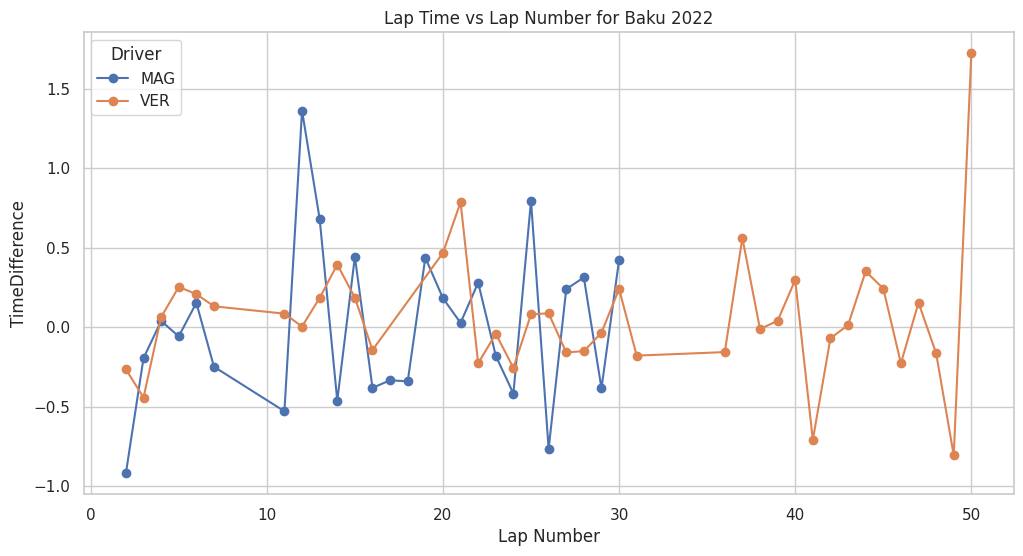

In [46]:
# Start plotting
plt.figure(figsize=(12, 6))

# Group by 'Driver' and plot each driver's lap times against lap numbers
for driver, group_data in baku2022TimeDifferenceSubOne.groupby('Driver'):
  if driver == 'MAG' or driver == 'VER':
    plt.plot(group_data['LapNumber'], group_data['TimeDifference'], label=driver, marker='o')

# Adding labels and title
plt.xlabel('Lap Number')
plt.ylabel('TimeDifference')
plt.title('Lap Time vs Lap Number for Baku 2022')
plt.legend(title='Driver')
plt.grid(True)

# Show plot
plt.show()

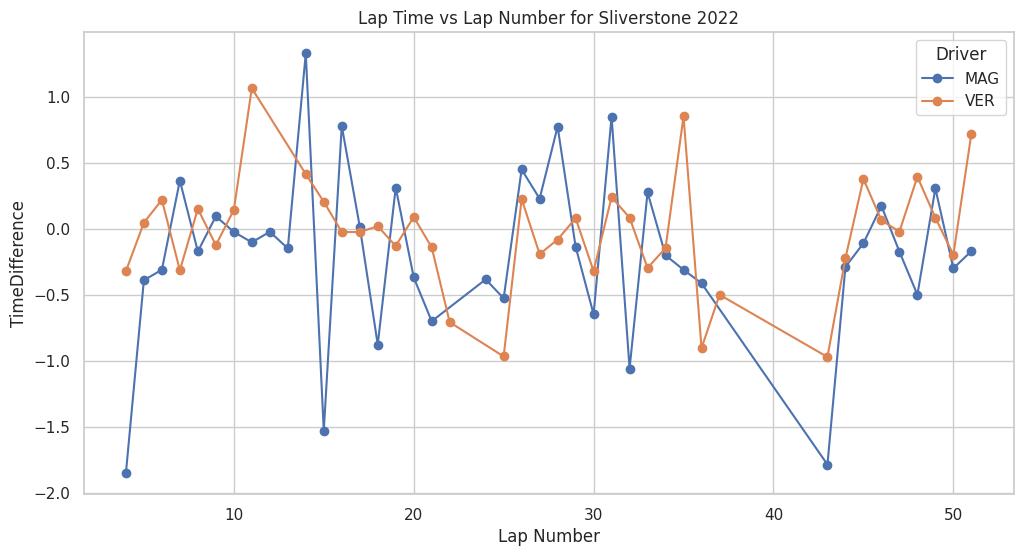

In [47]:
# Start plotting
plt.figure(figsize=(12, 6))

# Group by 'Driver' and plot each driver's lap times against lap numbers
for driver, group_data in sliverstone2022TimeDifferenceSubOne.groupby('Driver'):
  if driver == 'MAG' or driver == 'VER':
    plt.plot(group_data['LapNumber'], group_data['TimeDifference'], label=driver, marker='o')

# Adding labels and title
plt.xlabel('Lap Number')
plt.ylabel('TimeDifference')
plt.title('Lap Time vs Lap Number for Sliverstone 2022')
plt.legend(title='Driver')
plt.grid(True)

# Show plot
plt.show()

What are low and high tire wear tracks with the f1 dataset I am working with?

In [48]:
# Get average time difference per track.
def getAverageTimeDifferencePerTrack(year):
  eventCal = pd.read_csv(f'{BASE_PATH}/{year}/eventCalender{year}.csv')
  averageTimeDifferencePerTrack = pd.DataFrame(columns=['Track', 'Average Time Difference'])
  for _, event in eventCal.iterrows():
    if event['EventFormat'] != 'testing':
      raceDf = pd.read_csv(f'{BASE_PATH}/{year}/{event["RoundNumber"]}_{event["OfficialEventName"].replace(" ", "_")}/{event["RoundNumber"]}_{event["OfficialEventName"].replace(" ", "_")}_Race.csv')
      modifiedRaceDf = raceDf[(raceDf['TrackStatus'] == 1) & (raceDf['FreshTyre'] == False)]
      modifiedRaceDf['ConvertedLapTime'] = modifiedRaceDf['LapTime'].apply(lambda x: pd.to_timedelta(x).total_seconds())
      modifiedRaceDf = findTimeDifference(modifiedRaceDf)

      new_row = pd.DataFrame({
                'Track': [event['OfficialEventName']],
                'Average Time Difference': modifiedRaceDf['TimeDifference'].mean()
      })
      averageTimeDifferencePerTrack = pd.concat([averageTimeDifferencePerTrack, new_row], ignore_index=True)

  return averageTimeDifferencePerTrack

averageTimeDifference22 = getAverageTimeDifferencePerTrack(2022)
averageTimeDifference23 = getAverageTimeDifferencePerTrack(2023)

<ipython-input-48-a2cedbd7c4d8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modifiedRaceDf['ConvertedLapTime'] = modifiedRaceDf['LapTime'].apply(lambda x: pd.to_timedelta(x).total_seconds())
<ipython-input-36-4ea38cf7dde1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeDifference'] = new_col
<ipython-input-48-a2cedbd7c4d8>:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA col

In [55]:
raceDf = pd.read_csv(f'{BASE_PATH}/2023/12_FORMULA_1_MSC_CRUISES_BELGIAN_GRAND_PRIX_2023/12_FORMULA_1_MSC_CRUISES_BELGIAN_GRAND_PRIX_2023_Race.csv')
modifiedRaceDf = raceDf[(raceDf['TrackStatus'] == 1)]
modifiedRaceDf

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:04:40.504000,VER,1,0 days 00:01:55.659000,1.0,1.0,NaN,NaN,NaN,0 days 00:00:49.787000,...,True,Red Bull Racing,0 days 01:02:44.614000,2023-07-30 13:03:45.833,1,5.0,False,NaN,False,False
3,0 days 01:10:18.673000,VER,1,0 days 00:01:52.789000,4.0,1.0,NaN,NaN,0 days 00:00:31.881000,0 days 00:00:50.599000,...,True,Red Bull Racing,0 days 01:08:25.884000,2023-07-30 13:09:27.103,1,4.0,False,NaN,False,True
4,0 days 01:12:11.275000,VER,1,0 days 00:01:52.602000,5.0,1.0,NaN,NaN,0 days 00:00:32.001000,0 days 00:00:50.201000,...,True,Red Bull Racing,0 days 01:10:18.673000,2023-07-30 13:11:19.892,1,4.0,False,NaN,False,True
5,0 days 01:14:03.405000,VER,1,0 days 00:01:52.130000,6.0,1.0,NaN,NaN,0 days 00:00:31.967000,0 days 00:00:49.818000,...,True,Red Bull Racing,0 days 01:12:11.275000,2023-07-30 13:13:12.494,1,3.0,False,NaN,False,True
6,0 days 01:15:55.820000,VER,1,0 days 00:01:52.415000,7.0,1.0,NaN,NaN,0 days 00:00:32.639000,0 days 00:00:49.487000,...,True,Red Bull Racing,0 days 01:14:03.405000,2023-07-30 13:15:04.624,1,3.0,False,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,0 days 01:41:37.216000,SAI,55,0 days 00:01:56.426000,20.0,2.0,NaN,NaN,0 days 00:00:32.648000,0 days 00:00:52.419000,...,True,Ferrari,0 days 01:39:40.790000,2023-07-30 13:40:42.009,1,19.0,False,NaN,False,True
812,0 days 01:43:37.378000,SAI,55,0 days 00:02:00.162000,21.0,2.0,NaN,NaN,0 days 00:00:32.787000,0 days 00:00:54.760000,...,True,Ferrari,0 days 01:41:37.216000,2023-07-30 13:42:38.435,1,19.0,True,TRACK LIMITS AT TURN 11 LAP 21,False,True
813,0 days 01:45:35.327000,SAI,55,0 days 00:01:57.949000,22.0,2.0,NaN,NaN,0 days 00:00:32.936000,0 days 00:00:53.638000,...,True,Ferrari,0 days 01:43:37.378000,2023-07-30 13:44:38.597,1,19.0,False,NaN,False,True
814,0 days 01:47:38.690000,SAI,55,0 days 00:02:03.363000,23.0,2.0,NaN,0 days 01:47:34.913000,0 days 00:00:32.748000,0 days 00:00:52.157000,...,True,Ferrari,0 days 01:45:35.327000,2023-07-30 13:46:36.546,1,19.0,False,NaN,False,False


In [49]:
averageTimeDifference22

,Track,Average Time Difference
0,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,-0.428830
1,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,-0.278603
2,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,0.048270
3,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY ...,-0.981626
4,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,-0.535266
5,FORMULA 1 PIRELLI GRAN PREMIO DE ESPAÑA 2022,-0.488040
6,FORMULA 1 GRAND PRIX DE MONACO 2022,-1.610023
7,FORMULA 1 AZERBAIJAN GRAND PRIX 2022,-0.081859
8,FORMULA 1 AWS GRAND PRIX DU CANADA 2022,-0.231232
9,FORMULA 1 LENOVO BRITISH GRAND PRIX 2022,-1.209571


In [50]:
averageTimeDifference23
# All fresh tyre values seem to be True for ('FORMULA 1 MSC CRUISES BELGIAN GRAND PRIX 2023)

,Track,Average Time Difference
0,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,-0.209210
1,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,-0.697194
2,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,-0.278928
3,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,-0.125050
4,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,-0.192669
5,FORMULA 1 GRAND PRIX DE MONACO 2023,0.823955
6,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,-0.415533
7,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,0.257603
8,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023,-0.067878
9,FORMULA 1 ARAMCO BRITISH GRAND PRIX 2023,-0.118930


In [62]:
# Average stint length.
def getAverageTimeDifferencePerStint(year):
  eventCal = pd.read_csv(f'{BASE_PATH}/{year}/eventCalender{year}.csv')
  averageTimeDifferencePerTrack = pd.DataFrame(columns=['Track', 'Average Time Difference', 'Driver', 'Stint'])
  for _, event in eventCal.iterrows():
    if event['EventFormat'] != 'testing':
      raceDf = pd.read_csv(f'{BASE_PATH}/{year}/{event["RoundNumber"]}_{event["OfficialEventName"].replace(" ", "_")}/{event["RoundNumber"]}_{event["OfficialEventName"].replace(" ", "_")}_Race.csv')
      modifiedRaceDf = raceDf[raceDf['TrackStatus'] == 1]

      modifiedRaceDf['ConvertedLapTime'] = modifiedRaceDf['LapTime'].apply(lambda x: pd.to_timedelta(x).total_seconds())

      for driver in modifiedRaceDf['Driver'].unique():
        driverModifiedRaceDf = modifiedRaceDf[modifiedRaceDf['Driver'] == driver]
        for stint in modifiedRaceDf['Stint'].unique():
          stintModifiedRaceDf = driverModifiedRaceDf[driverModifiedRaceDf['Stint'] == stint]
          stintModifiedRaceDf = findTimeDifference(stintModifiedRaceDf)

          new_row = pd.DataFrame({
                    'Track': [event['OfficialEventName']],
                    'Average Time Difference': stintModifiedRaceDf['TimeDifference'].mean(),
                    'Driver': [driver],
                    'Stint': [stint],
          })

          averageTimeDifferencePerTrack = pd.concat([averageTimeDifferencePerTrack, new_row], ignore_index=True)

  return averageTimeDifferencePerTrack

In [63]:
# Plot this aganist amount of corners and continent.
getAverageTimeDifferencePerStint(2023)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeDifference'] = new_col
<ipython-input-36-4ea38cf7dde1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeDifference'] = new_col
<ipython-input-36-4ea38cf7dde1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeDifference'] = new_col
<ipython-input-36-4ea38cf7dde1>:11: SettingWithCopyWarning: 
A 

,Track,Average Time Difference,Driver,Stint
0,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,0.299000,VER,1.0
1,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,-0.829238,VER,2.0
2,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,-1.297941,VER,3.0
3,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,NaN,VER,4.0
4,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,NaN,VER,5.0
...,...,...,...,...
1850,FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...,-0.834667,BOT,2.0
1851,FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...,NaN,BOT,3.0
1852,FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...,-1.929000,MAG,1.0
1853,FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ...,-1.037812,MAG,2.0


In [115]:
# Plot this aganist amount of corners and continent.
averageTimeDifference22PerStint = getAverageTimeDifferencePerStint(2022)
averageTimeDifference23PerStint = getAverageTimeDifferencePerStint(2022)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeDifference'] = new_col
<ipython-input-36-4ea38cf7dde1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeDifference'] = new_col
<ipython-input-36-4ea38cf7dde1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeDifference'] = new_col
<ipython-input-36-4ea38cf7dde1>:11: SettingWithCopyWarning: 
A 

In [78]:
data = f1.get_session(2023, "FORMULA 1 MSC CRUISES BELGUIM GRAND PRIX", "Race")
data.load()
# Access circuit information
circuit_info = data.get_circuit_info()

events      WARNING 	Correcting user input 'FORMULA 1 MSC CRUISES BELGUIM GRAND PRIX' to 'Belgian Grand Prix'
core           INFO 	Loading data for Belgian Grand Prix - Race [v3.4.3]
INFO:fastf1.fastf1.core:Loading data for Belgian Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	Us

In [76]:
len(circuit_info.corners)

19

In [86]:
# For the time being, I will add this manually.
averageTimeDifference23_corners = []
for race in averageTimeDifference23['Track']:
  data = f1.get_session(2023, race, "Race")
  data.load()
  # Access circuit information
  circuit_info = data.get_circuit_info()
  averageTimeDifference23_corners.append(len(circuit_info.corners))
averageTimeDifference23['Corners'] = averageTimeDifference23_corners

core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.3]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.4.3]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_status_d

In [87]:
# For the time being, I will add this manually.
averageTimeDifference22_corners = []
for race in averageTimeDifference22['Track']:
  data = f1.get_session(2023, race, "Race")
  data.load()
  # Access circuit information
  circuit_info = data.get_circuit_info()
  averageTimeDifference22_corners.append(len(circuit_info.corners))
averageTimeDifference22['Corners'] = averageTimeDifference22_corners

events      WARNING 	Correcting user input 'FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022' to 'Bahrain Grand Prix'
core           INFO 	Loading data for Bahrain Grand Prix - Race [v3.4.3]
INFO:fastf1.fastf1.core:Loading data for Bahrain Grand Prix - Race [v3.4.3]
req            INFO 	Using cached data for session_info
INFO:fastf1.fastf1.req:Using cached data for session_info
req            INFO 	Using cached data for driver_info
INFO:fastf1.fastf1.req:Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
INFO:fastf1.fastf1.req:Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
INFO:fastf1.fastf1.req:Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
INFO:fastf1.fastf1.req:Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
INFO:fastf1.fastf1.req:Using cached data for _extended_timing_data
req            INFO 	

In [103]:
averageTimeDifference22

,Track,Average Time Difference,Corners,Continent
0,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,-0.428830,15,Asia
1,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,-0.278603,27,Asia
2,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,0.048270,14,Oceania
3,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY ...,-0.981626,17,Europe
4,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,-0.535266,19,North America
5,FORMULA 1 PIRELLI GRAN PREMIO DE ESPAÑA 2022,-0.488040,11,Europe
6,FORMULA 1 GRAND PRIX DE MONACO 2022,-1.610023,19,Europe
7,FORMULA 1 AZERBAIJAN GRAND PRIX 2022,-0.081859,20,Asia
8,FORMULA 1 AWS GRAND PRIX DU CANADA 2022,-0.231232,14,North America
9,FORMULA 1 LENOVO BRITISH GRAND PRIX 2022,-1.209571,18,Europe


In [104]:
averageTimeDifference23

,Track,Average Time Difference,Corners,Continent
0,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2023,-0.209210,15,Asia
1,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2023,-0.697194,27,Asia
2,FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2023,-0.278928,14,Oceania
3,FORMULA 1 AZERBAIJAN GRAND PRIX 2023,-0.125050,20,Asia
4,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2023,-0.192669,19,North America
5,FORMULA 1 GRAND PRIX DE MONACO 2023,0.823955,19,Europe
6,FORMULA 1 AWS GRAN PREMIO DE ESPAÑA 2023,-0.415533,14,Europe
7,FORMULA 1 PIRELLI GRAND PRIX DU CANADA 2023,0.257603,14,North America
8,FORMULA 1 ROLEX GROSSER PREIS VON ÖSTERREICH 2023,-0.067878,10,Europe
9,FORMULA 1 ARAMCO BRITISH GRAND PRIX 2023,-0.118930,18,Europe


In [106]:
averageTimeDifference22['Continent'] = ['Asia', 'Asia', 'Oceania', 'Europe', 'North America', 'Europe', 'Europe', 'Asia', 'North America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'Asia', 'North America', 'South America', 'South America', 'Asia']
averageTimeDifference23['Continent'] =  ['Asia', 'Asia', 'Oceania', 'Asia', 'North America', 'Europe', 'Europe', 'North America', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Asia', 'Asia', 'Asia', 'North America', 'South America', 'South America',  'North America', 'Asia']

In [116]:
averageTimeDifference22.to_csv(f'{BASE_PATH}/averageTimeDifference22.csv')
averageTimeDifference23.to_csv(f'{BASE_PATH}/averageTimeDifference23.csv')
averageTimeDifference22PerStint.to_csv(f'{BASE_PATH}/averageTimeDifference22PerStint.csv')
averageTimeDifference23PerStint.to_csv(f'{BASE_PATH}/averageTimeDifference23PerStint.csv')

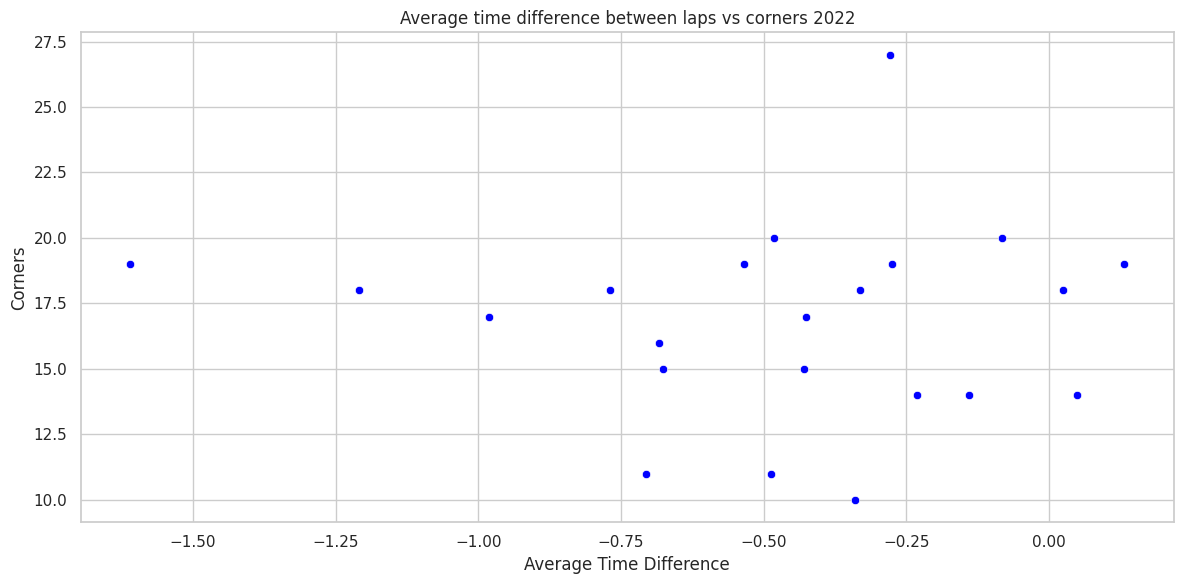

In [108]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Average Time Difference", y="Corners", data=averageTimeDifference22, color="blue")
plt.title("Average time difference between laps vs corners 2022")
plt.xlabel("Average Time Difference")
plt.ylabel("Corners")

# Adjust layout
plt.tight_layout()
plt.show()

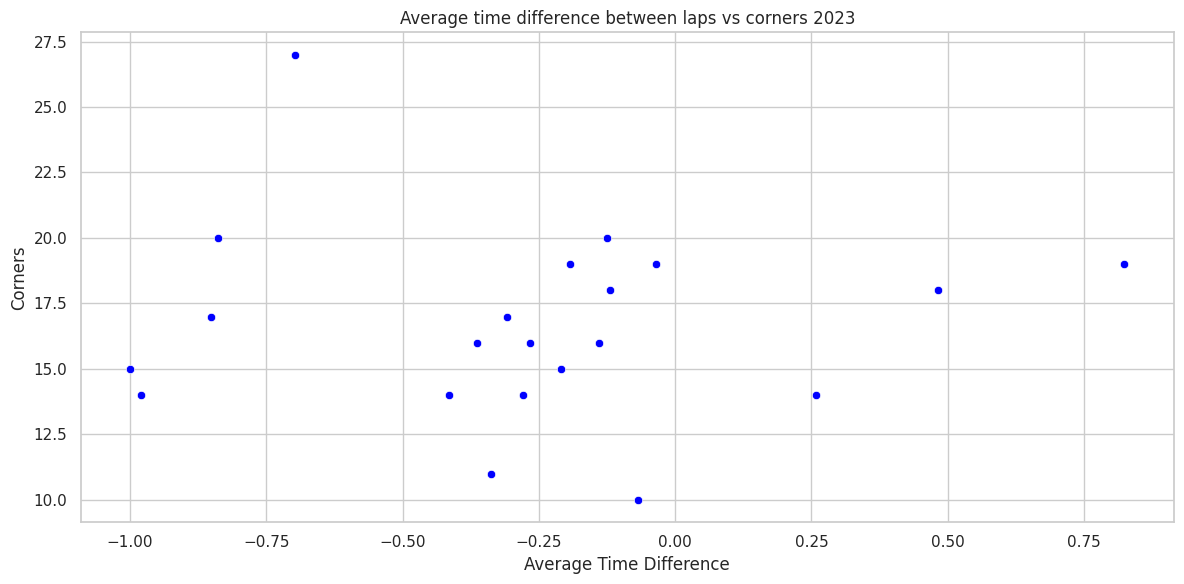

In [109]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Average Time Difference", y="Corners", data=averageTimeDifference23, color="blue")
plt.title("Average time difference between laps vs corners 2023")
plt.xlabel("Average Time Difference")
plt.ylabel("Corners")

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-110-3f201c7a27cd>:15: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


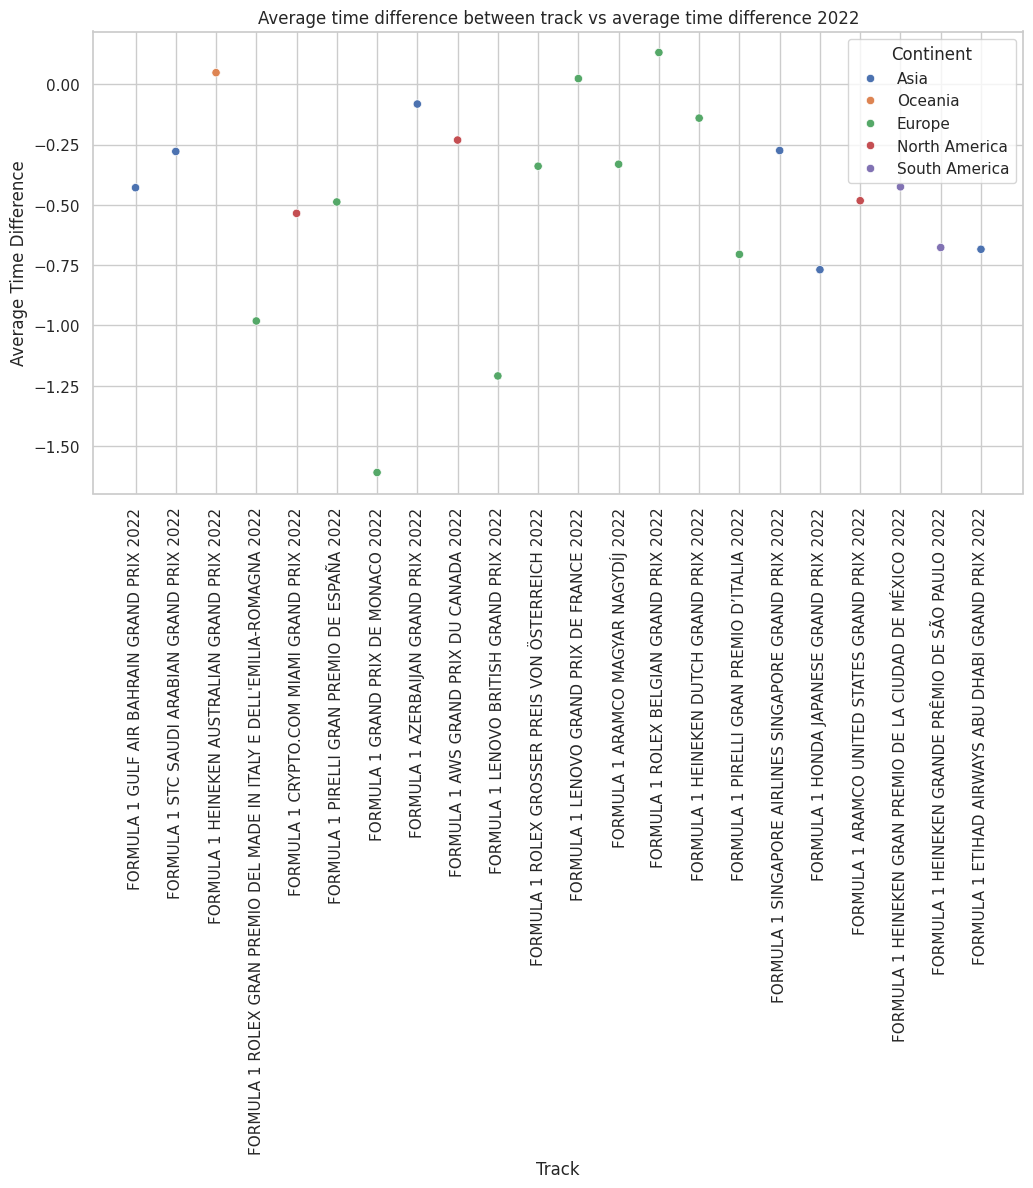

In [110]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Track", y="Average Time Difference", hue="Continent", data=averageTimeDifference22, color="blue")
plt.title("Average time difference between track vs average time difference 2022")
plt.xlabel("Track")
plt.ylabel("Average Time Difference")
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()

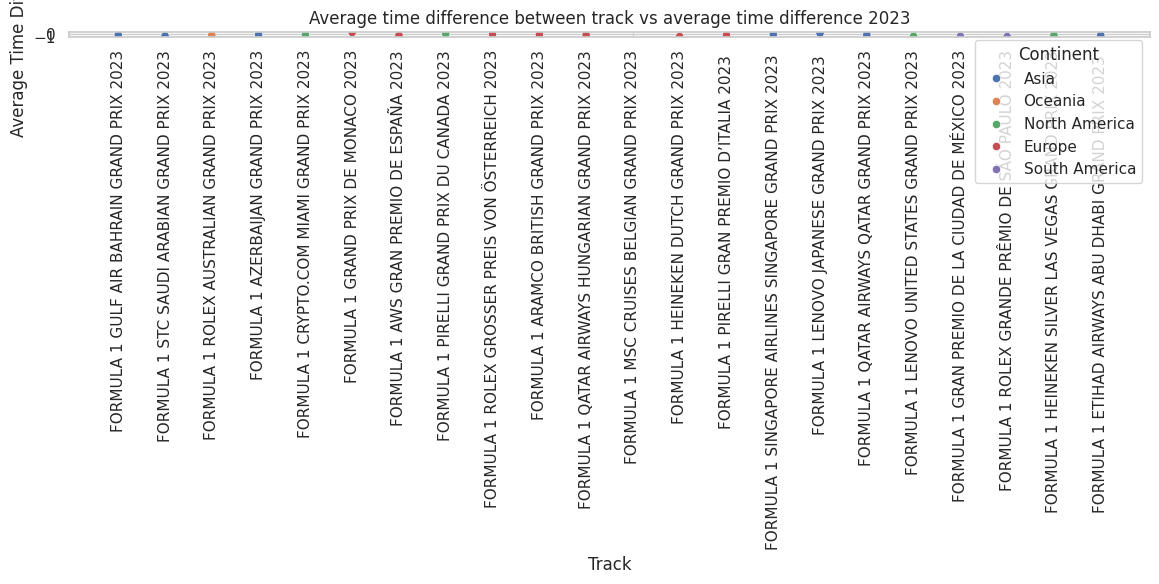

In [111]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(12, 6))

# Plot "Position Before Pit" vs. "Race Completed"
sns.scatterplot(x="Track", y="Average Time Difference", hue="Continent", data=averageTimeDifference23, color="blue")
plt.title("Average time difference between track vs average time difference 2023")
plt.xlabel("Track")
plt.ylabel("Average Time Difference")
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()